In [1]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [11]:
# Φόρτωση των δεδομένων από το URL
url = 'https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv'
data = pd.read_csv(url)

In [12]:
# Εξερεύνηση Δεδομένων
print("Επισκόπηση των δεδομένων:")
print(data.head())

Επισκόπηση των δεδομένων:
           src_ip         dest_ip  src_port  dest_port protocol  packet_size  \
0    114.208.13.8  122.46.117.227     57422      33910     ICMP     1.646143   
1   39.193.236.24    38.15.247.21     33946      34501      UDP     0.871719   
2  102.200.245.21  212.53.148.199     41742      49649      TCP     0.554511   
3   234.237.3.153   240.15.58.246     49115      53733     ICMP     0.652771   
4   185.28.108.97   30.169.201.31     18404      29740      UDP     1.592741   

   num_packets  flow_duration  bytes_transferred  packet_rate  \
0           29             23              27562         1887   
1           36             51              25373         1723   
2           42             59              47105         1099   
3           26             70              31164         1948   
4           20             13               2885         1661   

             timestamp  
0  2023-01-01 00:00:00  
1  2023-01-01 00:01:00  
2  2023-01-01 00:02:00  
3 

In [13]:
# Προεπεξεργασία δεδομένων
# Μετατροπή του timestamp σε αντικείμενο datetime για ευκολότερη ανάλυση χρόνου
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [14]:
# Δημιουργία νέων στηλών για ημέρα, ώρα κ.λπ.
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute

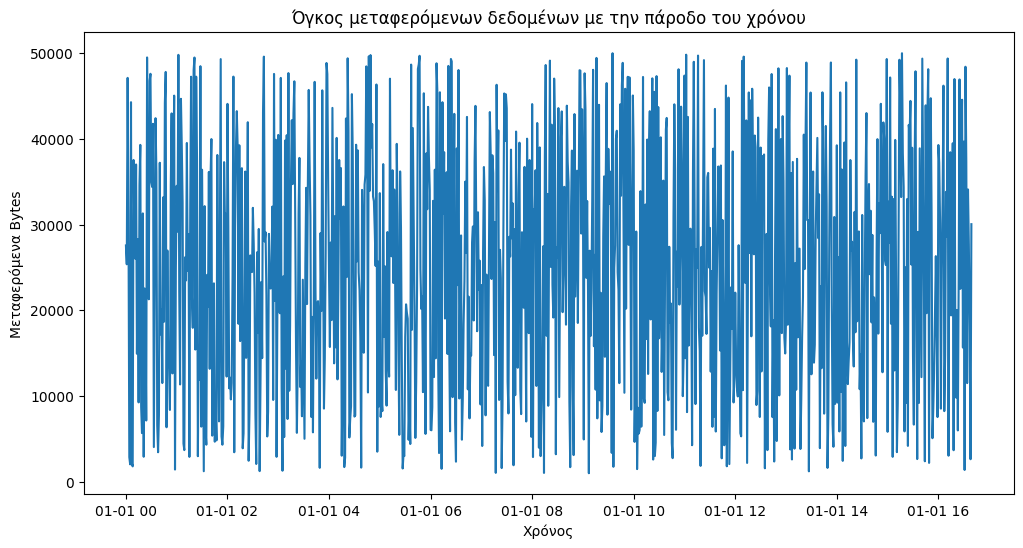

In [15]:
# Ανάλυση και Οπτικοποίηση της κυκλοφορίας σε σχέση με το χρόνο
plt.figure(figsize=(12,6))
plt.plot(data['timestamp'], data['bytes_transferred'])
plt.title("Όγκος μεταφερόμενων δεδομένων με την πάροδο του χρόνου")
plt.xlabel("Χρόνος")
plt.ylabel("Μεταφερόμενα Bytes")
plt.show()

In [16]:
# Ετοιμασία δεδομένων για εκπαίδευση μοντέλου
# Επιλογή χαρακτηριστικών (features) και στόχου (target)
features = data[['day', 'hour', 'minute']]
target = data['bytes_transferred']  # Χρήση της στήλης bytes_transferred ως μεταβλητή-στόχο

In [17]:
# Διαχωρισμός δεδομένων σε σύνολα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [18]:
# Δημιουργία και εκπαίδευση του μοντέλου γραμμικής παλινδρόμησης
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Πρόβλεψη με το μοντέλο στα δεδομένα δοκιμής
y_pred = model.predict(X_test)

In [20]:
# Αξιολόγηση του μοντέλου
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R^2): {r2}")

Mean Absolute Error (MAE): 12568.226090911088
R-squared Score (R^2): -0.006129023019954216


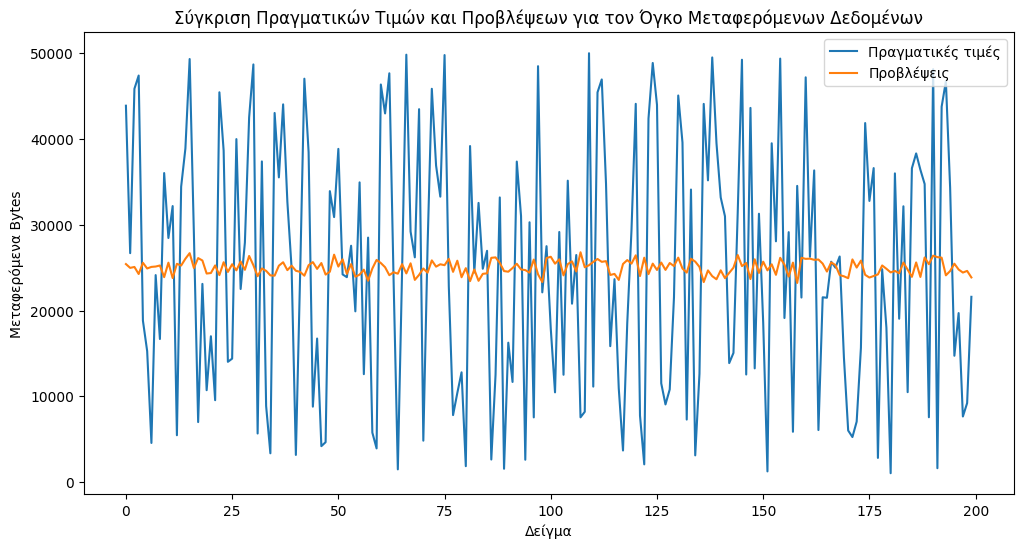

In [21]:
# Οπτικοποίηση των πραγματικών και προβλεπόμενων τιμών
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Πραγματικές τιμές")
plt.plot(y_pred, label="Προβλέψεις")
plt.title("Σύγκριση Πραγματικών Τιμών και Προβλέψεων για τον Όγκο Μεταφερόμενων Δεδομένων")
plt.xlabel("Δείγμα")
plt.ylabel("Μεταφερόμενα Bytes")
plt.legend()
plt.show()